## Імпортуємо модулі, датасет, читаємо датасет та форматумо його

In [1]:
# Імпорт необхідних бібліотек
import matplotlib.pyplot as plt  # Бібліотека для виводу графіків
import numpy as np  # Бібліотека для роботи із матрицями
import pandas as pd  # Бібліотека для читання датасету
import seaborn as sns  # Бібліотека для візуалізації данних

In [2]:
# Імпорт датасету
df = pd.read_csv('diabetes.csv')  # Читаємо датасет через pandas
df.head() # Виводимо верхню інформацію

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # Виводимо інформацію по колонках

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_nomiss = df[(df['Glucose']!=0) & (df['BloodPressure']!=0) & (df['SkinThickness']!=0)  & (df['Insulin']!=0) & (df['BMI']!=0)]
df_miss = df[(df['Glucose']==0) | (df['BloodPressure']==0) | (df['SkinThickness']==0)  | (df['Insulin']==0) | (df['BMI']==0)] # Сортуємо данні у змінні

In [5]:
X_nomiss = df_nomiss.drop('Outcome',axis=1)
y_nomiss = df_nomiss['Outcome'] # Сортуємо данні по колонках та рядках

<AxesSubplot:xlabel='Outcome', ylabel='count'>

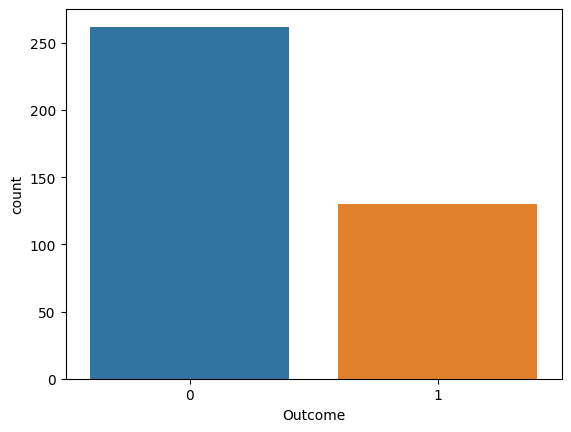

In [6]:
sns.countplot(x="Outcome", data=df_nomiss) # Демонструємо значення

# Починаємо створювати модель

In [7]:
from sklearn.model_selection import train_test_split # Бібліотека для нейронної мережі
X_train_nomiss,X_test_nomiss,y_train_nomiss,y_test_nomiss =  train_test_split(X_nomiss,y_nomiss,test_size=0.20, random_state=7,stratify=y_nomiss) # Параметри моделі

In [8]:
df_train_nomiss = pd.concat([X_train_nomiss,y_train_nomiss], axis=1) # Згруповуємо дані

In [9]:
df_train = pd.concat([df_train_nomiss,df_miss], axis=0) # Згруповуємо дані

In [10]:
ms_col = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] # Вибираємо необхідні колонки
for i in ms_col: # Проходимось по кожній колонці
    df_train.loc[((df_train['Outcome'] == 0) & (df_train[i] == 0)), i] =  df_train[(df_train['Outcome']==0) & (df_train[i]!=0)][i].median() 
    df_train.loc[((df_train['Outcome'] == 1) & (df_train[i] == 0)), i] =  df_train[(df_train['Outcome']==1) & (df_train[i]!=0)][i].median() # Додаємо у мережу

In [11]:
X = df_train.drop('Outcome', axis=1)  # Видаляємо Outcome
y=df_train['Outcome']

In [12]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1 =  train_test_split(X,y,test_size=0.20, random_state=7,stratify=y) # Розбиваємо дату на випадкові потяги та тестові підмножини.

In [13]:
X_test = pd.concat([X_test_1,X_test_nomiss], axis=0)
y_test = pd.concat([y_test_1,y_test_nomiss], axis=0) # Об'єднуємо об'єкти по осях

In [14]:
from sklearn.preprocessing import StandardScaler
scaling_x=StandardScaler()
X_train_1=scaling_x.fit_transform(X_train_1)
X_test=scaling_x.fit_transform(X_test)
X_test_1=scaling_x.fit_transform(X_test_1)
X_test_nomiss=scaling_x.fit_transform(X_test_nomiss)
#Стандартизуємо функції, видаливши середнє значення та масштабуючи дисперсію одиниць.

In [15]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import metrics  
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

## Задаємо конфігурацію можелі

In [16]:
xgb1 = XGBClassifier(  # Глобальна конфігурація 
 learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27,
 use_label_encoder=False,  
 )

xgb1.fit(X_train_1, 
          y_train_1,
         )


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=4, nthread=4, num_parallel_tree=1, predictor='auto',
              random_state=27, reg_alpha=0, ...)

## Тренеруємо та тетуємо модель

In [17]:
print("\nModel Report") 
y_preds = xgb1.predict(X_test)
y_pred_proba = xgb1.predict_proba(X_test)[:,1]

y_preds1 = xgb1.predict(X_train_1)
y_pred_proba1 = xgb1.predict_proba(X_train_1)[:,1] # Розбиваємо інформацію про тренування моделі

print('Accuracy (Train):', round(metrics.accuracy_score(y_train_1, y_preds1) * 100,2),'%')
print('Accuracy (Test):', round(metrics.accuracy_score(y_test, y_preds) * 100,2),'%')
print('AUC Score (Train):', round(metrics.roc_auc_score(y_train_1, y_pred_proba1) * 100,2),'%')
print('AUC Score (Test):', round(metrics.roc_auc_score(y_test, y_pred_proba) * 100,2),'%') # Виводимо інформацію


Model Report
Accuracy (Train): 99.82 %
Accuracy (Test): 82.49 %
AUC Score (Train): 100.0 %
AUC Score (Test): 88.64 %


## Встановлюємо ширші діапазони, а потім виконаємо ще одну ітерацію для менших діапазонів.

In [18]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}

gsearch1 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=100,
                                                #max_depth=5,
                                                #min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)  # автоматичне підбирання параметрів для моделей машинного навчання
eval_set = [(X_test, y_test)]

gsearch1.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch1.best_params_)
print("Best Score ==> ",gsearch1.best_score_)
print("Accuracy on Train set ==> ", gsearch1.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch1.score(X_test,y_test))

[0]	validation_0-auc:0.85688
[1]	validation_0-auc:0.88230
[2]	validation_0-auc:0.88055
[3]	validation_0-auc:0.89326
[4]	validation_0-auc:0.88164
[5]	validation_0-auc:0.89350
[6]	validation_0-auc:0.89184
[7]	validation_0-auc:0.89350
[8]	validation_0-auc:0.89468
[9]	validation_0-auc:0.89685
[10]	validation_0-auc:0.89742
[11]	validation_0-auc:0.89851
[12]	validation_0-auc:0.89728
[13]	validation_0-auc:0.89813
[14]	validation_0-auc:0.89624
[15]	validation_0-auc:0.89874
[16]	validation_0-auc:0.89789
[17]	validation_0-auc:0.89666
[18]	validation_0-auc:0.89903
[19]	validation_0-auc:0.90073
[20]	validation_0-auc:0.90177
[21]	validation_0-auc:0.90314
[22]	validation_0-auc:0.90276
[23]	validation_0-auc:0.90380
[24]	validation_0-auc:0.90285
[25]	validation_0-auc:0.90087
[26]	validation_0-auc:0.90087
[27]	validation_0-auc:0.90030
[28]	validation_0-auc:0.90021
Tuned Paramerers ==>  {'max_depth': 3, 'min_child_weight': 5}
Best Score ==>  0.9556312684926473
Accuracy on Train set ==>  0.98115019203557

c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [19]:
param_test2 = {
 'max_depth':[4,5,6],
 'min_child_weight':[2,3,4,5,6,7,8,9]
}


gsearch2 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=100,
                                                #max_depth=5,
                                                #min_child_weight=1,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test2, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]

gsearch2.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch2.best_params_)
print("Best Score ==> ",gsearch2.best_score_)
print("Accuracy on Train set ==> ", gsearch2.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch2.score(X_test,y_test))

[0]	validation_0-auc:0.86066
[1]	validation_0-auc:0.89010
[2]	validation_0-auc:0.88972
[3]	validation_0-auc:0.89506
[4]	validation_0-auc:0.89166
[5]	validation_0-auc:0.89761
[6]	validation_0-auc:0.89284
[7]	validation_0-auc:0.89383
[8]	validation_0-auc:0.89373
[9]	validation_0-auc:0.89241
[10]	validation_0-auc:0.89421
Tuned Paramerers ==>  {'max_depth': 4, 'min_child_weight': 7}
Best Score ==>  0.9569816937311378
Accuracy on Train set ==>  0.966805278812556
Accuracy on Test set ==>  0.8976091476091476


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [20]:
param_test3 = {
 'n_estimators':range(100,2000,25)
}

gsearch3 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                #n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0,
                                                subsample=0.8,
                                                colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test3, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]

gsearch3.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch3.best_params_)
print("Best Score ==> ",gsearch3.best_score_)
print("Accuracy on Train set ==> ", gsearch3.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch3.score(X_test,y_test))

[0]	validation_0-auc:0.86066
[1]	validation_0-auc:0.89095
[2]	validation_0-auc:0.89496
[3]	validation_0-auc:0.89799
[4]	validation_0-auc:0.89236
[5]	validation_0-auc:0.90044
[6]	validation_0-auc:0.89534
[7]	validation_0-auc:0.89605
[8]	validation_0-auc:0.89737
[9]	validation_0-auc:0.89794
Tuned Paramerers ==>  {'n_estimators': 100}
Best Score ==>  0.955417725275027
Accuracy on Train set ==>  0.9692382107482168
Accuracy on Test set ==>  0.9004441504441505


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [21]:
param_test4 = {
 'gamma':[i/10.0 for i in range(0,5)],
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                #gamma=0,
                                                #subsample=0.8,
                                                #colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test4, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch4.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch4.best_params_)
print("Best Score ==> ",gsearch4.best_score_)
print("Accuracy on Train set ==> ", gsearch4.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch4.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.89000
[2]	validation_0-auc:0.89081
[3]	validation_0-auc:0.90356
[4]	validation_0-auc:0.89562
[5]	validation_0-auc:0.90248
[6]	validation_0-auc:0.89600
[7]	validation_0-auc:0.89633
Tuned Paramerers ==>  {'colsample_bytree': 0.8, 'gamma': 0.1, 'subsample': 0.7}
Best Score ==>  0.9594194496714883
Accuracy on Train set ==>  0.9661483149961015
Accuracy on Test set ==>  0.9035626535626535


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [22]:
param_test5 = {
 'gamma':[i/100.0 for i in range(1,20,5)],
 'subsample':[i/100.0 for i in range(45,100,5)],
 'colsample_bytree':[i/100.0 for i in range(45,100,5)]
}
gsearch5 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                #gamma=0,
                                                #subsample=0.8,
                                                #colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test5, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch5.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch5.best_params_)
print("Best Score ==> ",gsearch5.best_score_)
print("Accuracy on Train set ==> ", gsearch5.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch5.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.89000
[2]	validation_0-auc:0.89081
[3]	validation_0-auc:0.90356
[4]	validation_0-auc:0.89562
[5]	validation_0-auc:0.90248
[6]	validation_0-auc:0.89600
[7]	validation_0-auc:0.89633
[8]	validation_0-auc:0.89879
Tuned Paramerers ==>  {'colsample_bytree': 0.75, 'gamma': 0.06, 'subsample': 0.7}
Best Score ==>  0.9598814094644339
Accuracy on Train set ==>  0.9661483149961015
Accuracy on Test set ==>  0.9035626535626535


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [23]:
param_test6 = {
 'nthread':range(1,10,1),
}
gsearch6 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0.06,
                                                subsample=0.75,
                                                colsample_bytree=0.8,
                                                objective= 'binary:logistic',
                                                #nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test6, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch6.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch6.best_params_)
print("Best Score ==> ",gsearch6.best_score_)
print("Accuracy on Train set ==> ", gsearch6.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch6.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.89321
[2]	validation_0-auc:0.90073
[3]	validation_0-auc:0.90994
[4]	validation_0-auc:0.90281
[5]	validation_0-auc:0.90734
[6]	validation_0-auc:0.90106
[7]	validation_0-auc:0.90077
[8]	validation_0-auc:0.90163
Tuned Paramerers ==>  {'nthread': 1}
Best Score ==>  0.9553737045907174
Accuracy on Train set ==>  0.9752519564526843
Accuracy on Test set ==>  0.90994140994141


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [24]:
param_test7 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch7 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.1,
                                                n_estimators=1000,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0.06,
                                                subsample=0.75,
                                                colsample_bytree=0.8,
                                                #reg_alpha=,
                                                objective= 'binary:logistic',
                                                nthread=1,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test7, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch7.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch7.best_params_)
print("Best Score ==> ",gsearch7.best_score_)
print("Accuracy on Train set ==> ", gsearch7.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch7.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.89321
[2]	validation_0-auc:0.90120
[3]	validation_0-auc:0.91004
[4]	validation_0-auc:0.90281
[5]	validation_0-auc:0.90734
[6]	validation_0-auc:0.90106
[7]	validation_0-auc:0.90087
Tuned Paramerers ==>  {'reg_alpha': 0.01}
Best Score ==>  0.9567099270537002
Accuracy on Train set ==>  0.9752519564526843
Accuracy on Test set ==>  0.91003591003591


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [25]:
param_test8 = {
 'learning_rate':[i/100.0 for i in range(1,10)]
}
gsearch8 = GridSearchCV(estimator=XGBClassifier(#learning_rate =0.1,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0.06,
                                                subsample=0.75,
                                                colsample_bytree=0.8,
                                                reg_alpha= 0.1,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test8, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch8.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch8.best_params_)
print("Best Score ==> ",gsearch8.best_score_)
print("Accuracy on Train set ==> ", gsearch8.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch8.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.88608
[2]	validation_0-auc:0.88906
[3]	validation_0-auc:0.89818
[4]	validation_0-auc:0.89364
[5]	validation_0-auc:0.90101
[6]	validation_0-auc:0.89463
[7]	validation_0-auc:0.89355
[8]	validation_0-auc:0.89496
[9]	validation_0-auc:0.89307
[10]	validation_0-auc:0.89232
Tuned Paramerers ==>  {'learning_rate': 0.03}
Best Score ==>  0.9546408492942964
Accuracy on Train set ==>  0.9684224205145976
Accuracy on Test set ==>  0.901011151011151


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [26]:
param_test9 = {
 'learning_rate':[i/100.0 for i in range(1,8)]
}
gsearch9 = GridSearchCV(estimator=XGBClassifier(#learning_rate =0.1,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0.06,
                                                subsample=0.75,
                                                colsample_bytree=0.8,
                                                reg_alpha= 0.1,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test9, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch9.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch9.best_params_)
print("Best Score ==> ",gsearch9.best_score_)
print("Accuracy on Train set ==> ", gsearch9.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch9.score(X_test,y_test))

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.88608
[2]	validation_0-auc:0.88906
[3]	validation_0-auc:0.89818
[4]	validation_0-auc:0.89364
[5]	validation_0-auc:0.90101
[6]	validation_0-auc:0.89463
[7]	validation_0-auc:0.89355
[8]	validation_0-auc:0.89496
[9]	validation_0-auc:0.89307
[10]	validation_0-auc:0.89232
Tuned Paramerers ==>  {'learning_rate': 0.03}
Best Score ==>  0.9546408492942964
Accuracy on Train set ==>  0.9684224205145976
Accuracy on Test set ==>  0.901011151011151


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [27]:
param_test10 = {
 'scale_pos_weight':range(1,8,1)
}
gsearch10 = GridSearchCV(estimator=XGBClassifier(learning_rate =0.06,
                                                n_estimators=100,
                                                max_depth=5,
                                                min_child_weight=6,
                                                gamma=0.06,
                                                subsample=0.75,
                                                colsample_bytree=0.8,
                                                reg_alpha= 0.1,
                                                objective= 'binary:logistic',
                                                nthread=4,
                                                scale_pos_weight=1,
                                                seed=27,
                                                use_label_encoder=False,  
                                                eval_metric='auc'),
                        param_grid = param_test10, 
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)
eval_set = [(X_test, y_test)]
gsearch10.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)
print("Tuned Paramerers ==> ",gsearch10.best_params_)
print("Best Score ==> ",gsearch10.best_score_)
print("Accuracy on Train set ==> ", gsearch10.score(X_train_1,y_train_1))
print("Accuracy on Test set ==> ", gsearch10.score(X_test,y_test))

[0]	validation_0-auc:0.84252
[1]	validation_0-auc:0.87965
[2]	validation_0-auc:0.88646
[3]	validation_0-auc:0.89822
[4]	validation_0-auc:0.89903
[5]	validation_0-auc:0.89874
[6]	validation_0-auc:0.89411
[7]	validation_0-auc:0.89520
[8]	validation_0-auc:0.89539
[9]	validation_0-auc:0.89662
Tuned Paramerers ==>  {'scale_pos_weight': 6}
Best Score ==>  0.9614003408666122
Accuracy on Train set ==>  0.9727540500736377
Accuracy on Test set ==>  0.8990266490266491


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


In [28]:
xgb =XGBClassifier(learning_rate =0.1,
                   n_estimators=100,
                   max_depth=5,
                   min_child_weight=6,
                   gamma=0.06,
                   subsample=0.75,
                   colsample_bytree=0.8,
                   objective= 'binary:logistic',
                   nthread=4,
                   scale_pos_weight=1,
                   seed=27,
                   use_label_encoder=False,  
                   eval_metric='auc')
xgb.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)

print("\nModel Report")
y_predsx = xgb.predict(X_test)
y_predx_proba = xgb.predict_proba(X_test)[:,1]

y_predsx1 = xgb.predict(X_train_1)
y_predx_proba1 = xgb.predict_proba(X_train_1)[:,1]

print('Accuracy (Train):', round(metrics.accuracy_score(y_train_1, y_predsx1) * 100,2),'%')
print('Accuracy (Test):', round(metrics.accuracy_score(y_test, y_predsx) * 100,2),'%')
print('AUC Score (Train):', round(metrics.roc_auc_score(y_train_1, y_predx_proba1) * 100,2),'%')
print('AUC Score (Test):', round(metrics.roc_auc_score(y_test, y_predx_proba) * 100,2),'%')

[0]	validation_0-auc:0.85631
[1]	validation_0-auc:0.89321
[2]	validation_0-auc:0.90073
[3]	validation_0-auc:0.90994
[4]	validation_0-auc:0.90281
[5]	validation_0-auc:0.90734
[6]	validation_0-auc:0.90106
[7]	validation_0-auc:0.90077

Model Report
Accuracy (Train): 91.11 %
Accuracy (Test): 84.33 %
AUC Score (Train): 97.53 %
AUC Score (Test): 90.99 %


c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


# Optuna

## Оптимізовуємо модель

In [29]:
import optuna

c:\Users\ykuch\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
def objective(trial):
    
    param_opt = {
        'tree_method':'gpu_hist',  # this parameter means using the GPU when training our model to speedup the training process
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.0001, 10.0),
        'gamma': trial.suggest_loguniform('gamma', 0.0001, 1.0),
        'alpha': trial.suggest_loguniform('alpha', 0.0001, 10.0),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.0001, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 1e-3, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 1e-3, 1.0),
        'n_estimators' : trial.suggest_int('n_estimators', 2, 5000),
        'max_depth' : trial.suggest_int('max_depth', 2,11),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300),
    }
    model = XGBClassifier(**param_opt,
                          use_label_encoder=False,  
                          eval_metric='auc')  
    
    model.fit(X_train_1,y_train_1,eval_set=[(X_test,y_test)],early_stopping_rounds=100,verbose=False)
    
    preds = model.predict(X_test)
    
    rmse = metrics.mean_squared_error(y_test, preds,squared=False)
    
    return rmse

In [31]:
xgbo =XGBClassifier(reg_lambda = 0.6083218264746052, 
                    gamma = 0.32053291645882975,
                    alpha= 0.07560553155609716, 
                    colsample_bytree= 0.009167517288777674, 
                    subsample= 0.5788156381210019, 
                    learning_rate= 0.35791054440702436, 
                    n_estimators= 790, 
                    max_depth= 5, 
                    min_child_weight= 6,
                    use_label_encoder=False,  
                    eval_metric='auc')
eval_set=[X_test,y_test]
#xgbo.fit(X_train_1, y_train_1,early_stopping_rounds=5,eval_set=eval_set)

xgbo.fit(X_train_1, y_train_1)

print("\nModel Report")
y_predsx = xgbo.predict(X_test)
y_predx_proba = xgbo.predict_proba(X_test)[:,1]

y_predsx1 = xgbo.predict(X_train_1)
y_predx_proba1 = xgbo.predict_proba(X_train_1)[:,1]

print('Accuracy (Train):', round(metrics.accuracy_score(y_train_1, y_predsx1) * 100,2),'%')
print('Accuracy (Test):', round(metrics.accuracy_score(y_test, y_predsx) * 100,2),'%')
print('AUC Score (Train):', round(metrics.roc_auc_score(y_train_1, y_predx_proba1) * 100,2),'%')
print('AUC Score (Test):', round(metrics.roc_auc_score(y_test, y_predx_proba) * 100,2),'%')


Model Report
Accuracy (Train): 96.01 %
Accuracy (Test): 78.34 %
AUC Score (Train): 99.29 %
AUC Score (Test): 87.71 %
